In [ ]:
# Setup
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Show all columns
pd.set_option('display.max_columns', None)

# Show all rows
pd.set_option('display.max_rows', None)



Import Data

In [2]:
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(os.path.join(repo_root, "src"))

from code_location_interview.code_location_interview.assets.magenta_interview.get_data import (
    core_data as core_data_asset,
    usage_info as usage_info_asset,
    customer_interactions as customer_interactions_asset,
)

rating_account_id, unique_customer_ids, core_data = core_data_asset()
usage_info = usage_info_asset(rating_account_id)
customer_interactions = customer_interactions_asset(unique_customer_ids)

[2025-07-10 11:23:16] Context impl SQLiteImpl.
[2025-07-10 11:23:16] Will assume non-transactional DDL.
[2025-07-10 11:23:16] Running stamp_revision  -> 7e2f3204cf8e
[2025-07-10 11:23:16] Context impl SQLiteImpl.
[2025-07-10 11:23:16] Will assume non-transactional DDL.
[2025-07-10 11:23:16] Running stamp_revision  -> 7e2f3204cf8e
[2025-07-10 11:23:16] Age
[2025-07-10 11:23:16] contract_lifetime_days
[2025-07-10 11:23:16] remaining_binding_days
[2025-07-10 11:23:17] has_special_offer
[2025-07-10 11:23:17] available_gb
[2025-07-10 11:23:17] gross_mrc
[2025-07-10 11:23:17] smartphone_brand
[2025-07-10 11:23:17] 0.43093
[2025-07-10 11:23:17] Create df
[2025-07-10 11:23:17] Context impl SQLiteImpl.
[2025-07-10 11:23:17] Will assume non-transactional DDL.
[2025-07-10 11:23:17] Running stamp_revision  -> 7e2f3204cf8e
[2025-07-10 11:23:17] Context impl SQLiteImpl.
[2025-07-10 11:23:17] Will assume non-transactional DDL.
[2025-07-10 11:23:17] Running stamp_revision  -> 7e2f3204cf8e
[2025-07-10 

# EDA

## Dataset Overview

### Dataset overview - Core Data

In [3]:
core_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   rating_account_id       100000 non-null  int64  
 1   customer_id             100000 non-null  object 
 2   age                     100000 non-null  int64  
 3   contract_lifetime_days  100000 non-null  int64  
 4   remaining_binding_days  100000 non-null  int64  
 5   has_special_offer       100000 non-null  int64  
 6   is_magenta1_customer    100000 non-null  int64  
 7   available_gb            85749 non-null   object 
 8   gross_mrc               100000 non-null  float64
 9   smartphone_brand        100000 non-null  object 
 10  has_done_upselling      100000 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 8.4+ MB


In [4]:
core_data.head(5)

,rating_account_id,customer_id,age,contract_lifetime_days,remaining_binding_days,has_special_offer,is_magenta1_customer,available_gb,gross_mrc,smartphone_brand,has_done_upselling
0,952919,4.796992,47,896,-584,0,0,30,42.14,iPhone,0
1,160933,1.193998,35,733,199,0,0,20,54.08,iPhone,0
2,396908,4.198849,53,90,-43,0,0,30,35.51,Samsung,0
3,616574,4.349238,37,119,-111,0,0,10,60.71,OnePlus,0
4,992305,4.788450,42,662,219,0,0,30,16.94,iPhone,0


In [5]:
missing = core_data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(core_data)) * 100

# Combine into a clean summary table
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_percent.round(2)
})

missing_df

,Missing Count,Missing %
available_gb,14251,14.25


Data Granularity

In [6]:
print("Number of rows:", core_data.shape[0])
print("Number of unique rating_account_id:", core_data['rating_account_id'].nunique())

Number of rows: 100000
Number of unique rating_account_id: 100000


In [7]:
core_data.duplicated().sum()

0

In [8]:
conflicting = core_data[core_data.duplicated(subset=core_data.columns.difference(['has_done_upselling']), keep=False)]
conflicting.sort_values(['rating_account_id','has_done_upselling']).head(5)

,rating_account_id,customer_id,age,contract_lifetime_days,remaining_binding_days,has_special_offer,is_magenta1_customer,available_gb,gross_mrc,smartphone_brand,has_done_upselling


### Dataset overview - usage_info

In [9]:
usage_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   rating_account_id      400000 non-null  int64  
 1   billed_period_month_d  400000 non-null  object 
 2   has_used_roaming       400000 non-null  int64  
 3   used_gb                400000 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 12.2+ MB


In [10]:
usage_info.head(5)

,rating_account_id,billed_period_month_d,has_used_roaming,used_gb
0,952919,2024-04-01,0,0.7
1,952919,2024-05-01,0,0.3
2,952919,2024-06-01,0,0.8
3,952919,2024-07-01,1,0.7
4,160933,2024-04-01,0,0.6


In [11]:
missing = usage_info.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(usage_info)) * 100

# Combine into a clean summary table
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_percent.round(2)
})

missing_df

,Missing Count,Missing %


### Dataset overview - customer_interactions

In [12]:
customer_interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63055 entries, 0 to 63054
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      63055 non-null  object
 1   type_subtype     63055 non-null  object
 2   n                63055 non-null  int64 
 3   days_since_last  63055 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


In [13]:
customer_interactions.head(5)

,customer_id,type_subtype,n,days_since_last
0,1.123787,produkte&services-tarifdetails,2,30
1,1.123787,rechnungsanfragen,2,86
2,5.570127,produkte&services-tarifwechsel,1,6
3,2.391742,produkte&services-tarifdetails,2,113
4,2.391742,rechnungsanfragen,1,89


In [14]:
missing = customer_interactions.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(customer_interactions)) * 100

# Combine into a clean summary table
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_percent.round(2)
})

missing_df

,Missing Count,Missing %


## Detailed EDA

### Detailed EDA - Core Data

In [15]:
core_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   rating_account_id       100000 non-null  int64  
 1   customer_id             100000 non-null  object 
 2   age                     100000 non-null  int64  
 3   contract_lifetime_days  100000 non-null  int64  
 4   remaining_binding_days  100000 non-null  int64  
 5   has_special_offer       100000 non-null  int64  
 6   is_magenta1_customer    100000 non-null  int64  
 7   available_gb            85749 non-null   object 
 8   gross_mrc               100000 non-null  float64
 9   smartphone_brand        100000 non-null  object 
 10  has_done_upselling      100000 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 8.4+ MB


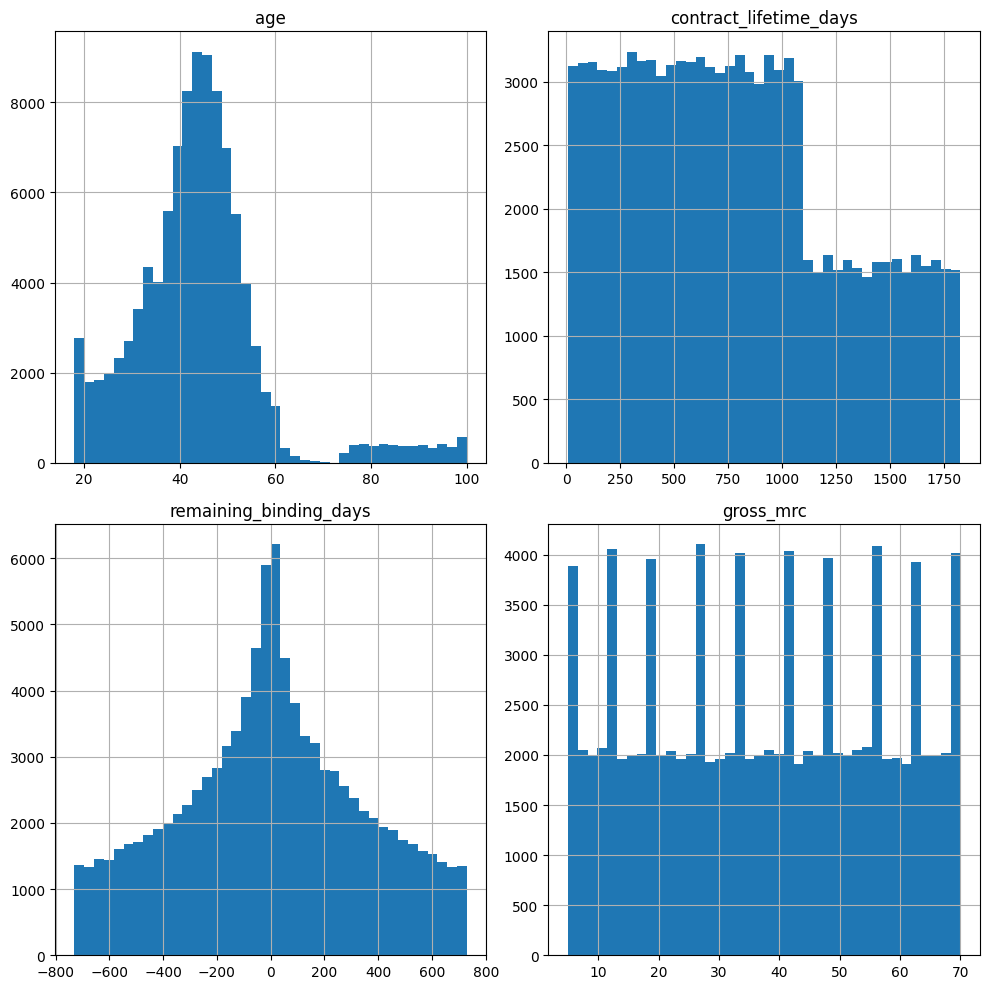

In [16]:
excluded = ['rating_account_id', 'customer_id', 'smartphone_brand','has_done_upselling','has_special_offer','is_magenta1_customer']
core_data.drop(columns=excluded, errors='ignore').hist(bins=40, figsize=(10, 10))
plt.tight_layout()
plt.show()

age

This is right-skewed distribution, with high concentration between 35–55. It can be potentially predictive.

contract_lifetime_days

Bimodal distribution. A massive drop at around 3 years (c. 1100 days) indicates some business cycle perhaps. 

remaining_binding_days

A normally distributed variable with 0 mean with symmetric spread. Might be useful due to remaining time until contract ends.

gross_mrc

Uniformly distributed across all pricing range. Potentially predictive due to different cohorts of customers for to be targeted.

[2025-07-10 11:24:02] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[2025-07-10 11:24:02] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-07-10 11:24:02] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-07-10 11:24:02] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-07-10 11:24:02] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-07-10 11:24:02] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as 

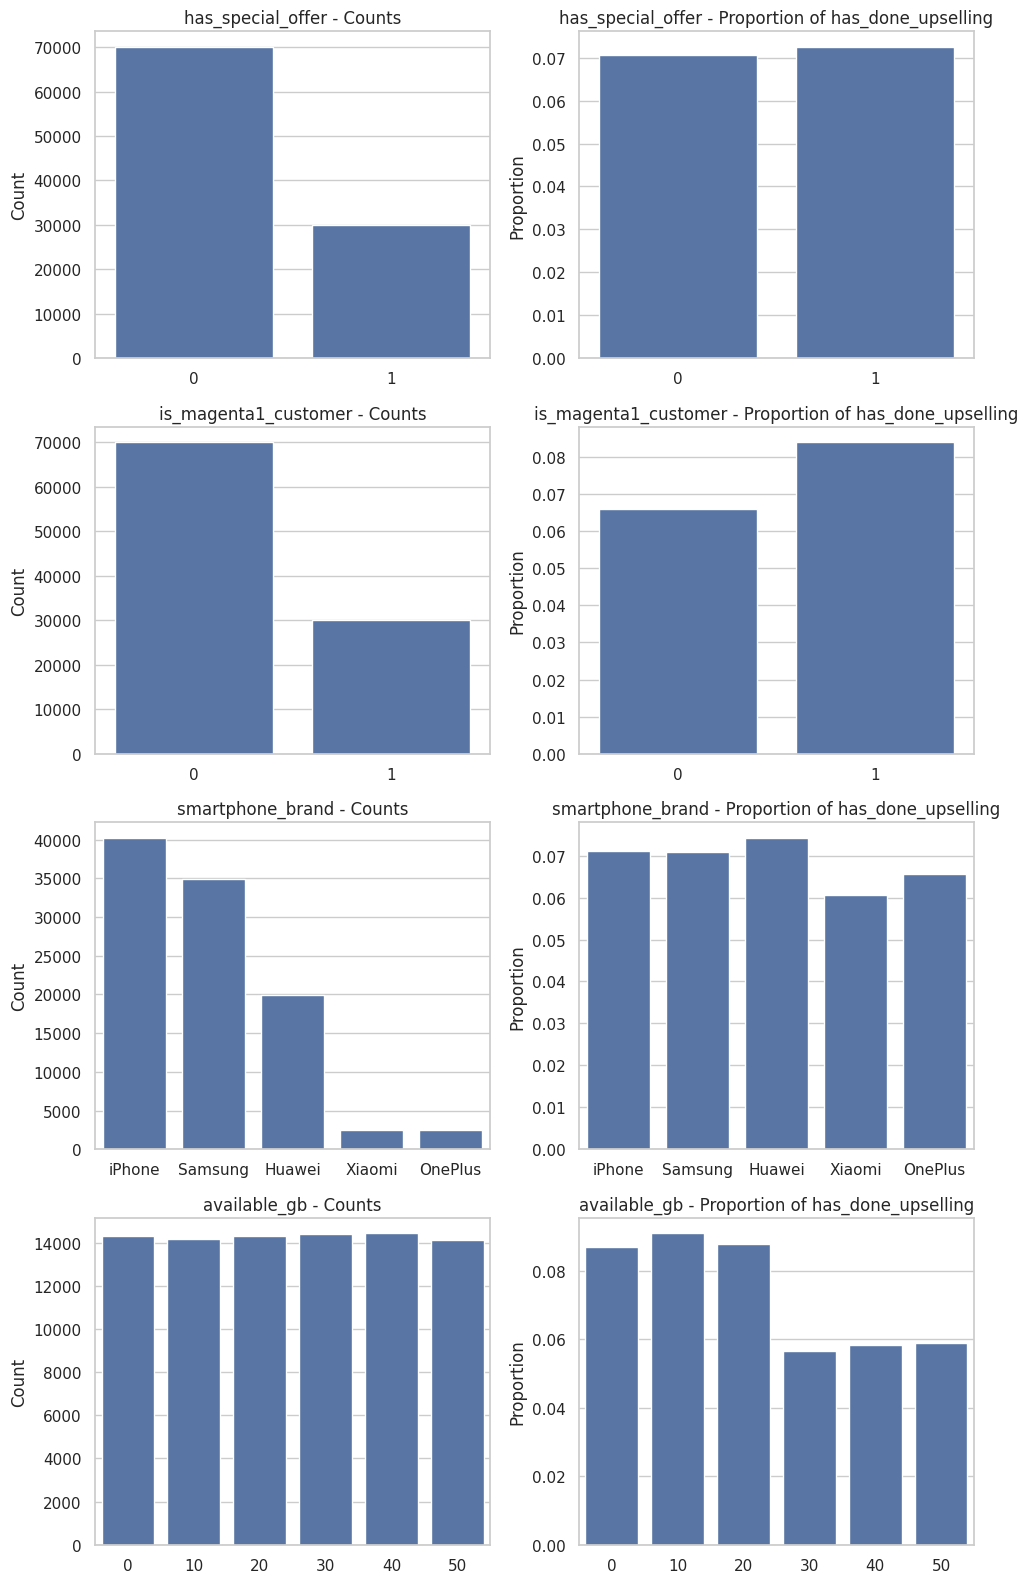

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Seaborn style
sns.set(style="whitegrid")

# List of relevant columns
features = ['has_special_offer', 'is_magenta1_customer', 'smartphone_brand', 'available_gb']
target = 'has_done_upselling'

# Custom sort order for 'available_gb'
available_gb_order = sorted(core_data['available_gb'].dropna().unique(), key=lambda x: int(x))

# Set up the figure
n_features = len(features)
plt.figure(figsize=(10, 4 * n_features))

for i, col in enumerate(features):
    # Determine sort order
    if col == 'available_gb':
        order = available_gb_order
    else:
        order = core_data[col].value_counts().index

    # Count plot
    plt.subplot(n_features, 2, 2 * i + 1)
    sns.countplot(x=col, data=core_data, order=order)
    plt.title(f'{col} - Counts')
    plt.xlabel('')
    plt.ylabel('Count')

    # Proportion plot
    prop_df = core_data.groupby(col)[target].mean().reset_index()
    plt.subplot(n_features, 2, 2 * i + 2)
    sns.barplot(x=col, y=target, data=prop_df, order=order)
    plt.title(f'{col} - Proportion of {target}')
    plt.xlabel('')
    plt.ylabel('Proportion')

plt.tight_layout()
plt.show()



Non-significant differences in proportion of upselling across 'has_special_offer' and 'smartphone_brands'. 

On the contrary, it is evident that the ratio of upselling is higher for customers of 'magenta_1' loyalty programme.

Furthermore, there is a higher concentration of "upselling" within the lower bands of 'available_gb'.

Potentially, both the 'available_gb' and the 'magenta_1' features can be strong predictors of upselling.

### Detailed EDA - Usage Info

Analysis of the binary variable has_used_roaming

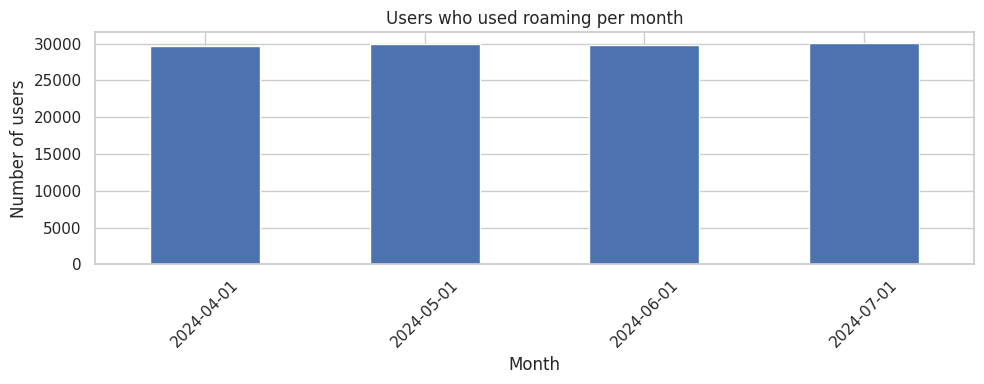

In [18]:
monthly_roaming = usage_info.groupby('billed_period_month_d')['has_used_roaming'].sum()

monthly_roaming.plot(kind='bar', figsize=(10, 4), title='Users who used roaming per month')
plt.ylabel("Number of users")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

No real difference across the billing months. 

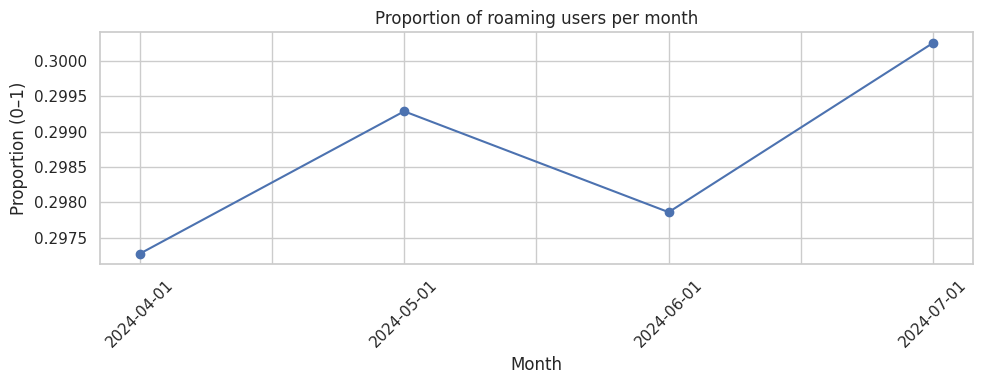

In [19]:
monthly_prop = usage_info.groupby('billed_period_month_d')['has_used_roaming'].mean()

monthly_prop.plot(kind='line', marker='o', figsize=(10, 4), title='Proportion of roaming users per month')
plt.ylabel("Proportion (0–1)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Roaming usage remained stable across the four months, with only minor variation. 

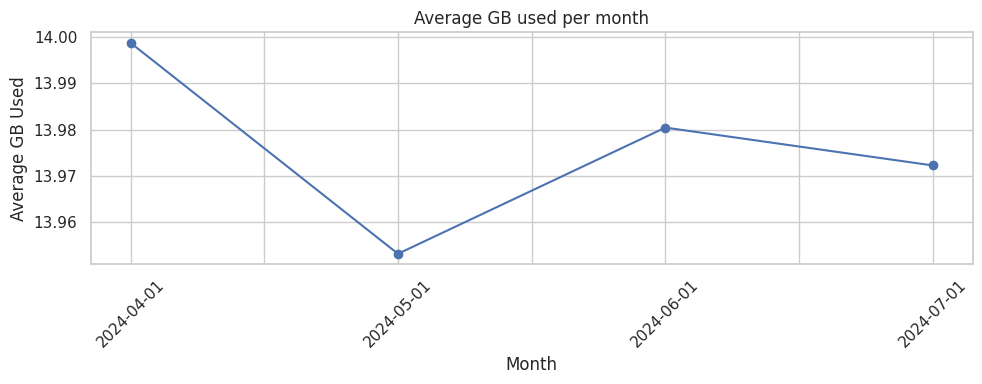

In [20]:
avg_gb = usage_info.groupby('billed_period_month_d')['used_gb'].mean()

avg_gb.plot(kind='line', marker='o', figsize=(10, 4), title='Average GB used per month')
plt.ylabel("Average GB Used")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A slight variation across months in terms of average GB used per month.

### Detailed EDA - Customer Interaction

In [21]:
customer_interactions.head(5)

,customer_id,type_subtype,n,days_since_last
0,1.123787,produkte&services-tarifdetails,2,30
1,1.123787,rechnungsanfragen,2,86
2,5.570127,produkte&services-tarifwechsel,1,6
3,2.391742,produkte&services-tarifdetails,2,113
4,2.391742,rechnungsanfragen,1,89


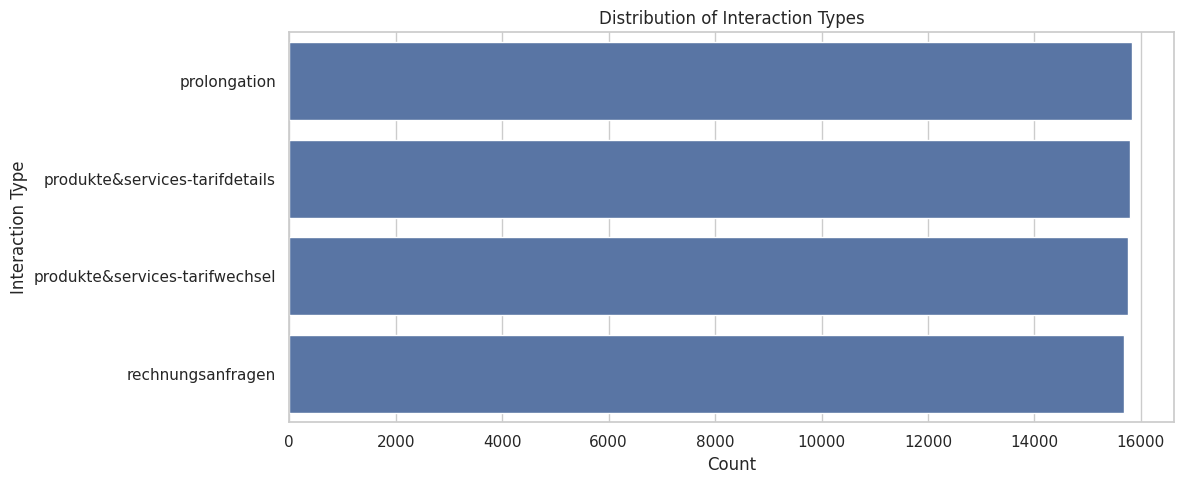

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.countplot(y='type_subtype', data=customer_interactions, order=customer_interactions['type_subtype'].value_counts().index)
plt.title('Distribution of Interaction Types')
plt.xlabel('Count')
plt.ylabel('Interaction Type')
plt.tight_layout()
plt.show()

All four interaction types occur with similar frequency, justifying the inclusion of per-type count and recency features.  

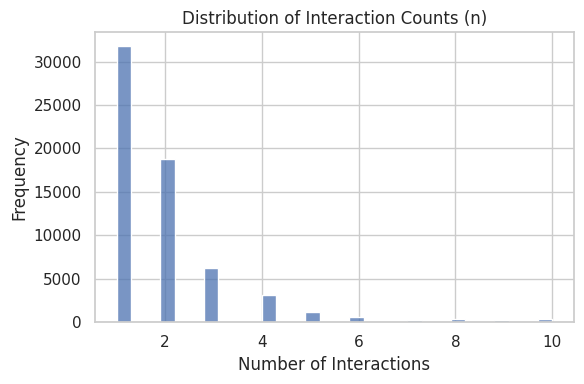

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(customer_interactions['n'], bins=30, kde=False)
plt.title('Distribution of Interaction Counts (n)')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Most customers only interact once or twice

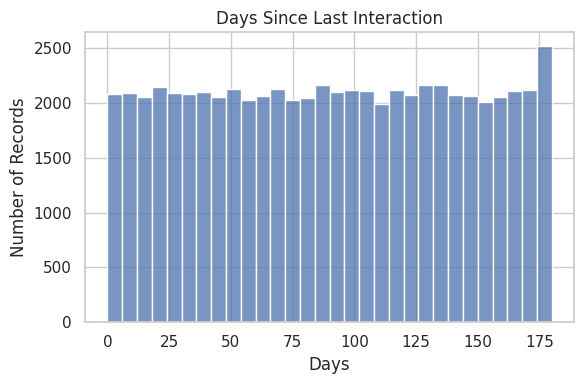

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(customer_interactions['days_since_last'], bins=30, kde=False)
plt.title('Days Since Last Interaction')
plt.xlabel('Days')
plt.ylabel('Number of Records')
plt.tight_layout()
plt.show()

Interaction recency is evenly distributed across the customer base; only a spike exists near the maximum. 

## FE and Merging

### Feature Engineering Summary

**1. Usage Features (`rating_account_id` level)**  
- Aggregated `used_gb` (avg, std, max, min, range)  
- Calculated `used_roaming_ratio` and `usage_months`

**2. Interaction Features (`customer_id` level)**  
- Count of interactions per type (e.g. `tarifwechsel_n`)  
- Recency per type (`*_recency`), missing set to 999

**3. Contract & Pricing Features**  
- `num_contracts`, `binding_ratio` (clipped)  
- `price_per_gb` = `gross_mrc` / `available_gb`  
- `has_multiple_contracts` as binary

In [ ]:
# Usage feature aggregation (per rating_account_id)
usage_agg = usage_info.groupby('rating_account_id').agg(
    avg_gb_used=('used_gb', 'mean'),
    std_gb_used=('used_gb', 'std'),
    max_gb_used=('used_gb', 'max'),
    min_gb_used=('used_gb', 'min'),
    used_gb_range=('used_gb', lambda x: x.max() - x.min()),
    used_roaming_ratio=('has_used_roaming', 'mean'),
    usage_months=('used_gb', 'count')
).reset_index()

# Interaction count pivot (per customer_id)
interactions_n = customer_interactions.pivot_table(
    index='customer_id',
    columns='type_subtype',
    values='n',
    aggfunc='sum',
    fill_value=0
).reset_index()
interactions_n.columns.name = None
interactions_n.columns = ['customer_id'] + [f"{col}_n" for col in interactions_n.columns[1:]]

# Interaction recency pivot (min days_since_last)
interactions_recency = customer_interactions.pivot_table(
    index='customer_id',
    columns='type_subtype',
    values='days_since_last',
    aggfunc='min'
).reset_index()
interactions_recency.columns.name = None
interactions_recency.columns = ['customer_id'] + [f"{col}_recency" for col in interactions_recency.columns[1:]]

# Fill missing recency with 999
recency_cols = [col for col in interactions_recency.columns if col.endswith('_recency')]
interactions_recency[recency_cols] = interactions_recency[recency_cols].fillna(999)

# Merge interaction count and recency
customer_interactions_agg = pd.merge(interactions_n, interactions_recency, on='customer_id', how='outer')

# STEP 2: Prepare core_data cleanly before merge

# Drop duplicated interaction features
interaction_prefixes = ['produkte&services', 'prolongation', 'rechnungsanfragen']
for prefix in interaction_prefixes:
    core_data = core_data.drop(columns=[col for col in core_data.columns if col.startswith(prefix)], errors='ignore')

# Ensure correct types for merge
core_data['customer_id'] = core_data['customer_id'].astype(str)
customer_interactions_agg['customer_id'] = customer_interactions_agg['customer_id'].astype(str)

# Merge interaction features
core_data = core_data.merge(customer_interactions_agg, on='customer_id', how='left')

# Merge usage features
core_data = core_data.merge(usage_agg, on='rating_account_id', how='left')

# Add contract count per customer (ensure same type before groupby)
contract_counts = core_data[['customer_id', 'rating_account_id']].copy()
contract_counts['customer_id'] = contract_counts['customer_id'].astype(str)
contract_counts = contract_counts.groupby('customer_id')['rating_account_id'].nunique().reset_index(name='num_contracts')

# Merge contract counts
core_data = core_data.merge(contract_counts, on='customer_id', how='left')

# Feature engineering
core_data['binding_ratio'] = core_data['remaining_binding_days'] / core_data['contract_lifetime_days']
core_data['binding_ratio'] = core_data['binding_ratio'].clip(0, 1)

core_data['price_per_gb'] = core_data['gross_mrc'] / core_data['available_gb'].astype(float).replace(0, np.nan)
core_data['price_per_gb'] = core_data['price_per_gb'].replace([np.inf, -np.inf], np.nan)
core_data['price_per_gb'] = core_data['price_per_gb'].fillna(core_data['price_per_gb'].median())

core_data['has_multiple_contracts'] = (core_data['num_contracts'] > 1).astype(int)

# Usage-based features: fill missing with 0
usage_fill = {
    'avg_gb_used': 0,
    'std_gb_used': 0,
    'max_gb_used': 0,
    'min_gb_used': 0,
    'used_gb_range': 0,
    'used_roaming_ratio': 0,
    'usage_months': 0
}
core_data.fillna(value=usage_fill, inplace=True)

# Fill 0 for missing interaction counts
n_cols = [col for col in core_data.columns if col.endswith('_n')]
core_data[n_cols] = core_data[n_cols].fillna(0)

# Fill 999 for missing interaction recency
recency_cols = [col for col in core_data.columns if col.endswith('_recency')]
core_data[recency_cols] = core_data[recency_cols].fillna(999)


### Target Variable analysis

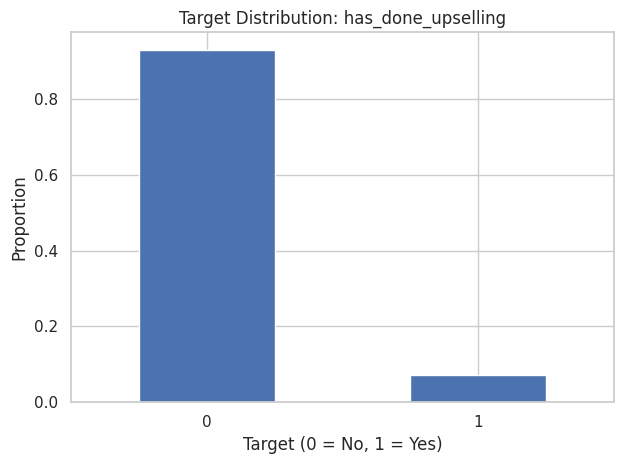

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

core_data['has_done_upselling'].value_counts(normalize=True).plot(kind='bar')
plt.title('Target Distribution: has_done_upselling')
plt.xlabel('Target (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [37]:
core_data['has_done_upselling'].value_counts()


has_done_upselling
0    92876
1     7124
Name: count, dtype: int64

In [38]:
core_data.groupby('customer_id')['has_done_upselling'].max().value_counts(normalize=True)

has_done_upselling
0    0.88281
1    0.11719
Name: proportion, dtype: float64

### Univariate Analysis Vs Target Variable

[2025-07-10 11:26:22] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-07-10 11:26:22] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-07-10 11:26:22] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-07-10 11:26:22] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-07-10 11:26:22] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as 

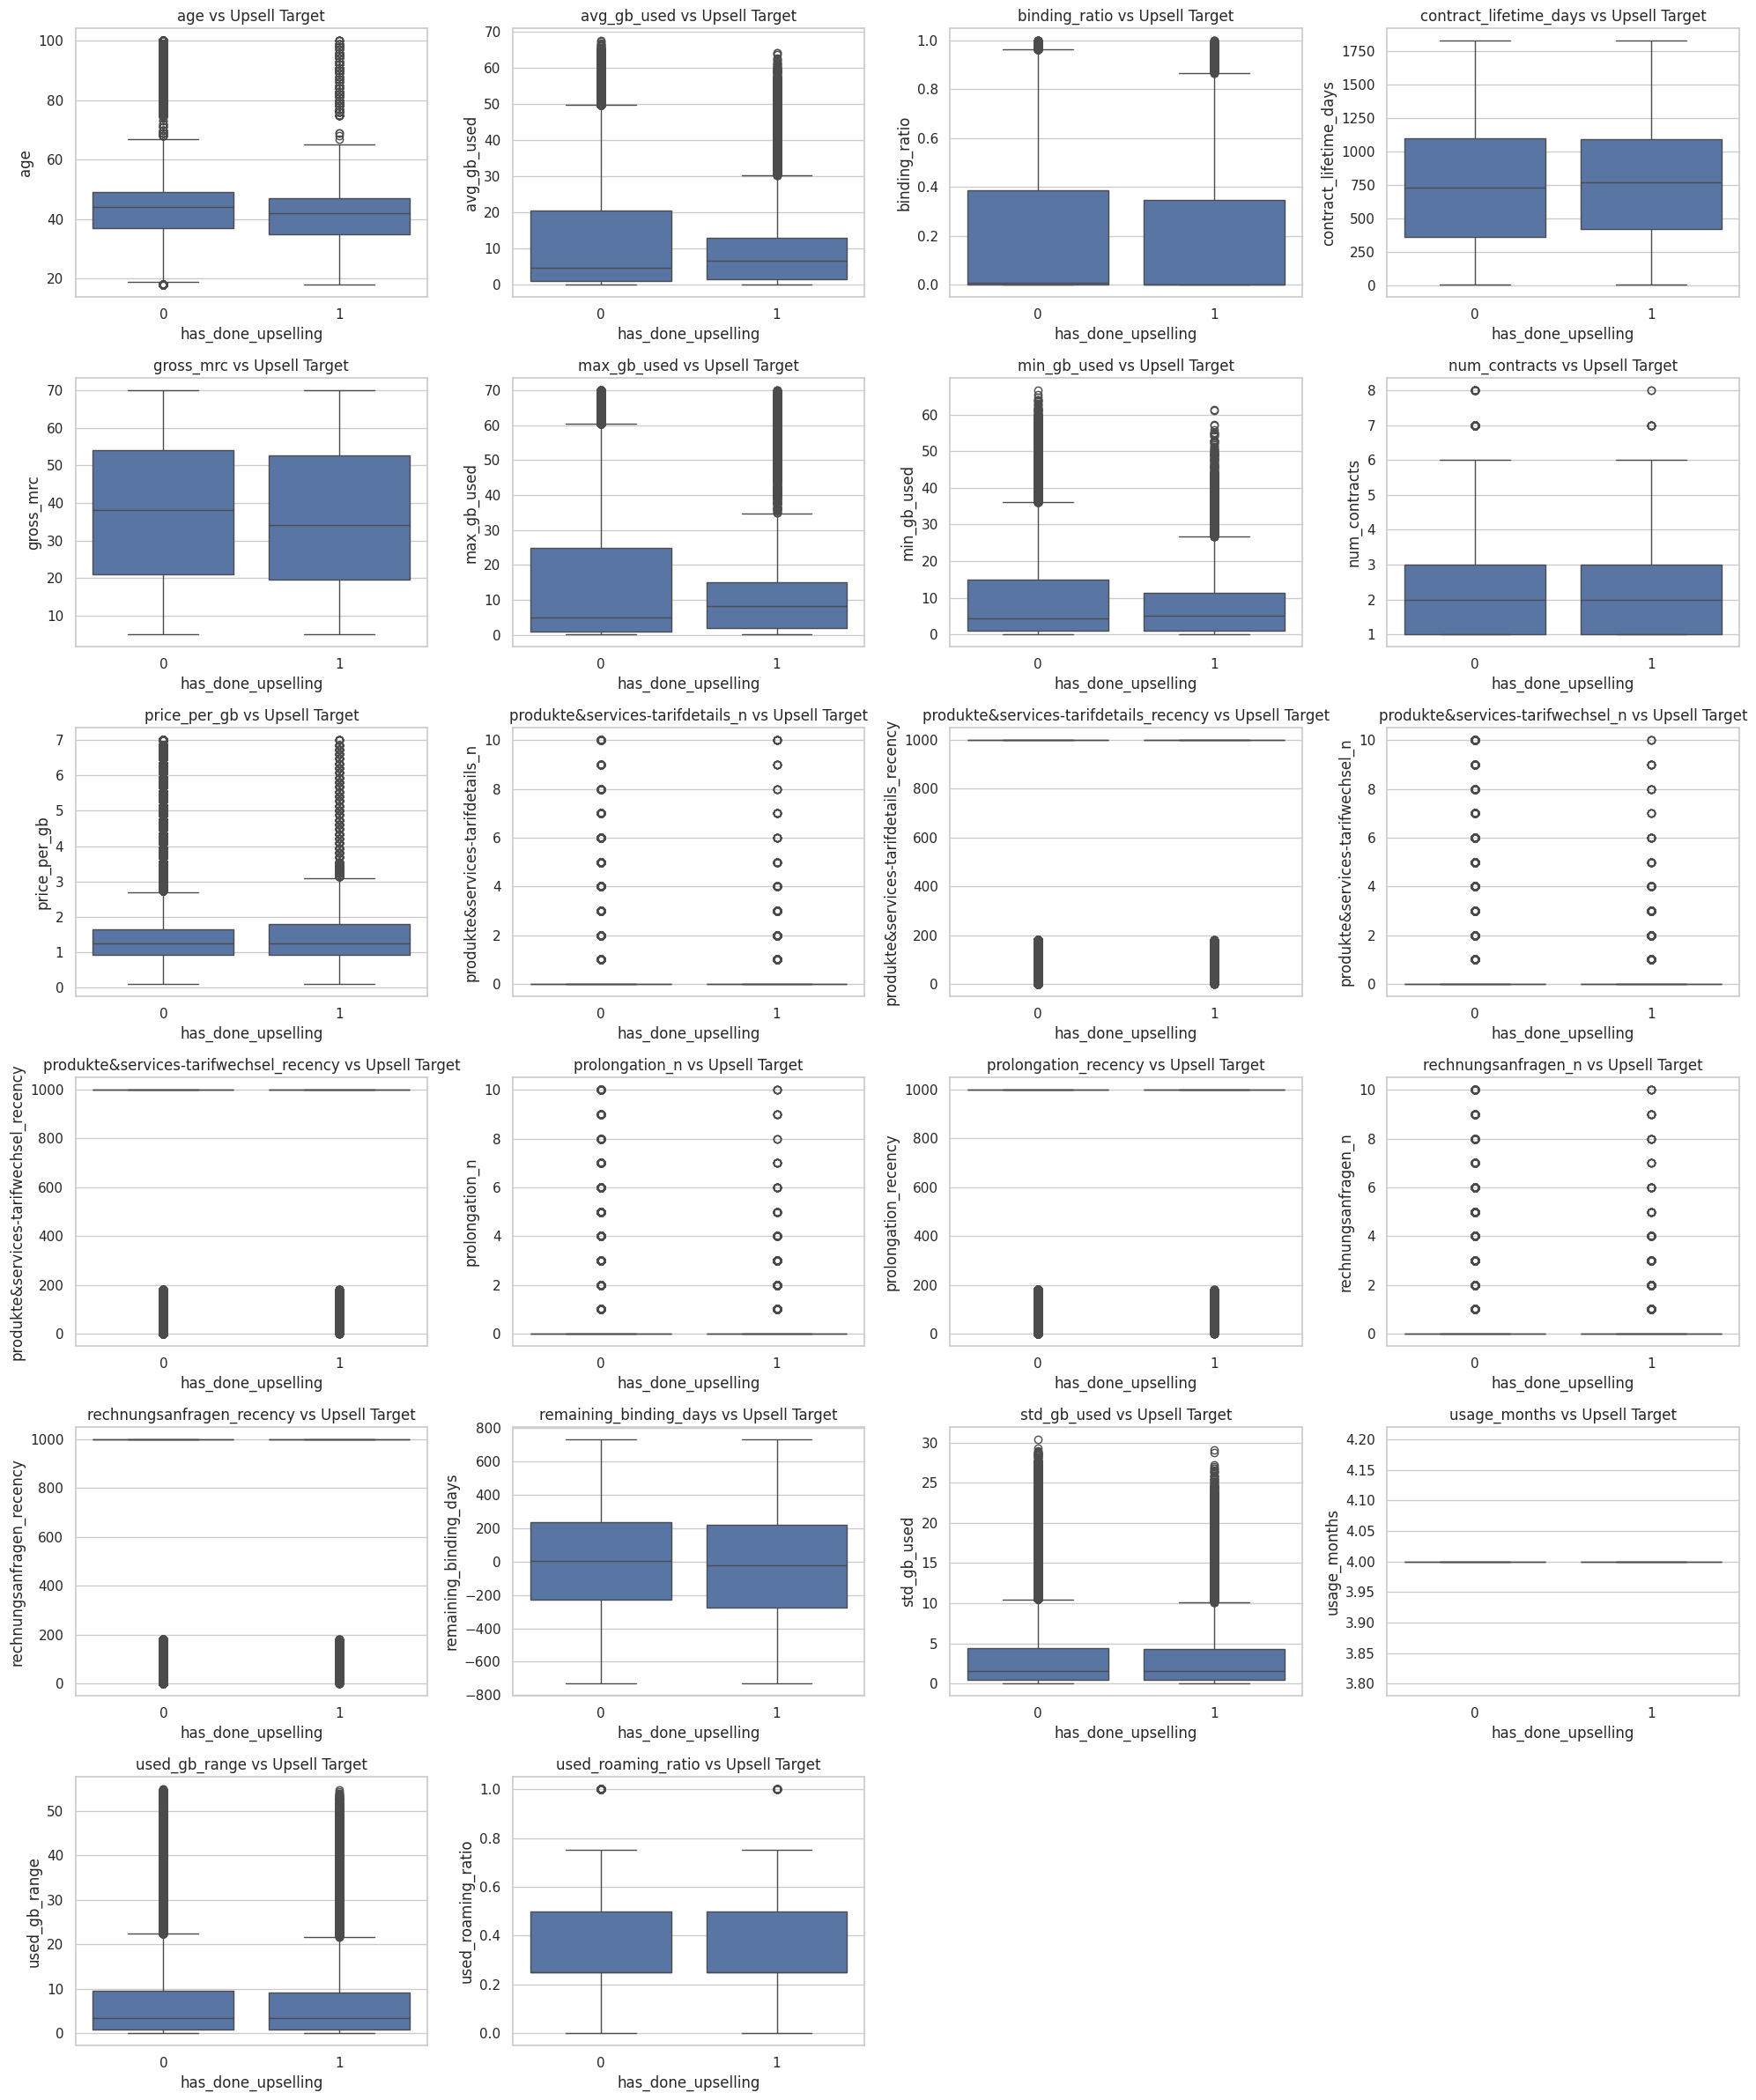

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Columns to exclude
exclude_cols = [
    'rating_account_id', 'customer_id', 'smartphone_brand',
    'has_done_upselling', 'has_special_offer', 'is_magenta1_customer', 'has_multiple_contracts'
]

# Select numerical features only
feature_cols = core_data.select_dtypes(include='number').columns.difference(exclude_cols)

# ✅ Ensure features are truly numeric (fix warning)
core_data[feature_cols] = core_data[feature_cols].apply(pd.to_numeric, errors='coerce')

# Grid size
n_cols = 4
n_rows = int(np.ceil(len(feature_cols) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Plot boxplots
for i, col in enumerate(feature_cols):
    sns.boxplot(x='has_done_upselling', y=col, data=core_data, ax=axes[i])
    axes[i].set_title(f'{col} vs Upsell Target')

# Turn off unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



For the vast majority of features the corresponding value ranges are overlapping for the 2 levels of the target. 

There is some difference observed across the following features: Age, Avg_gb_used, Contract_lifetime_days, Gross_mrc, max_gb_used, remaining_binding_days. 

These features could potentially be good predictors for upselling propensity.  

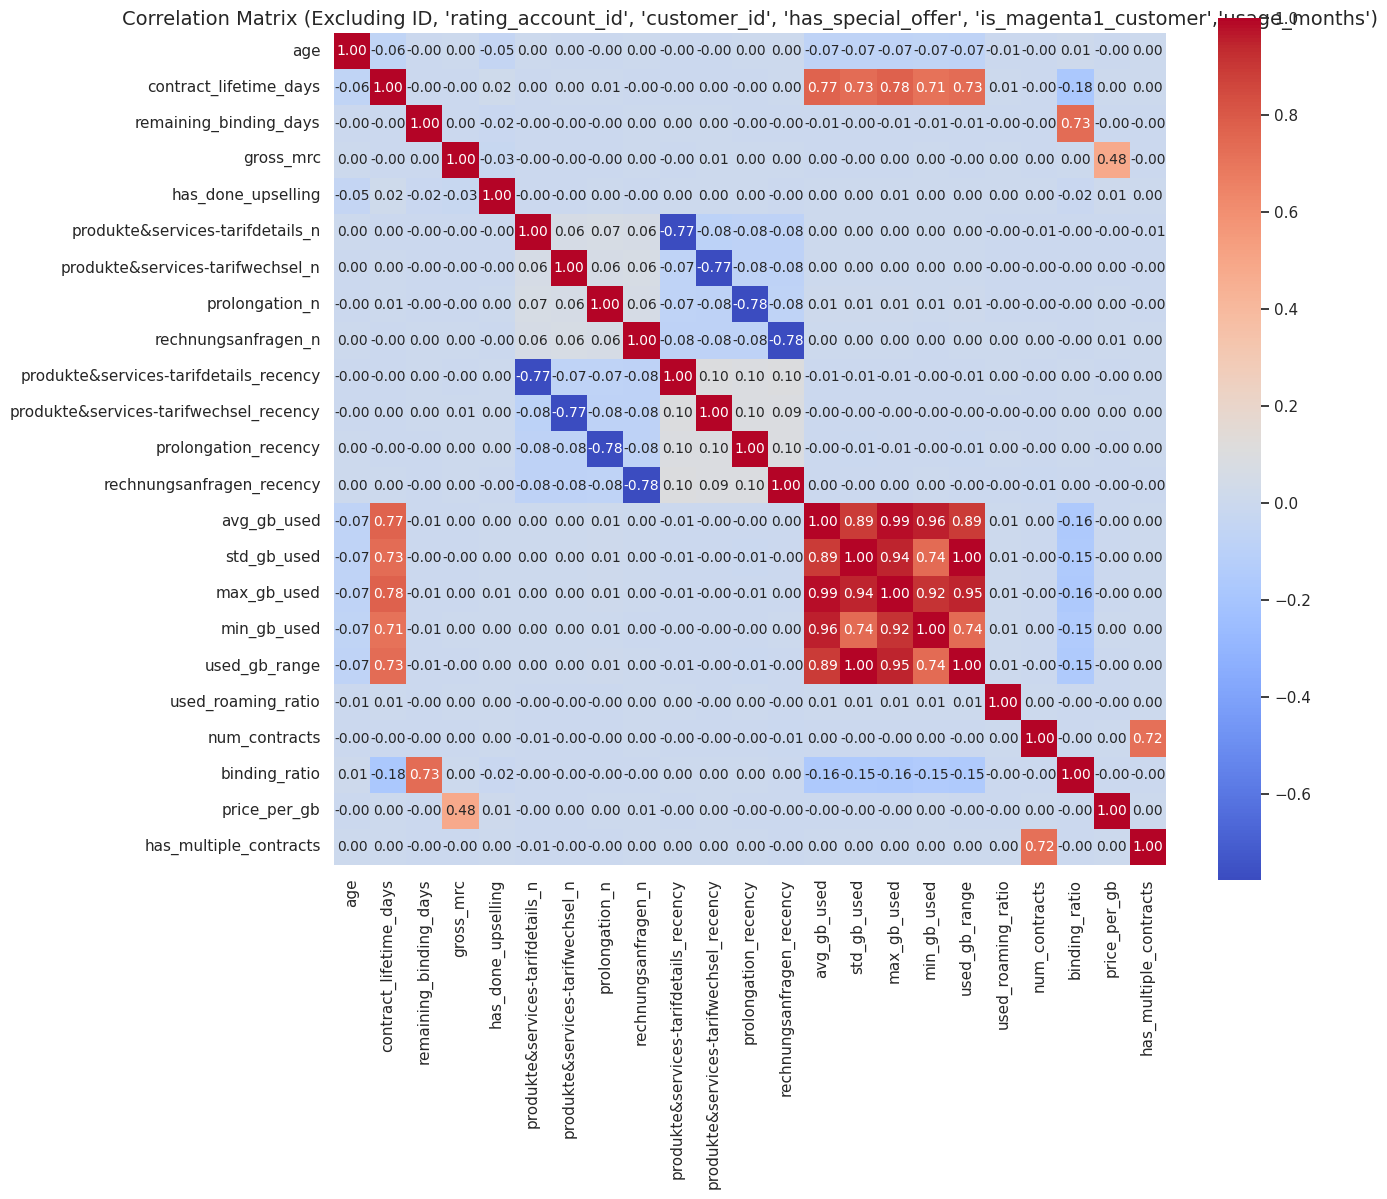

In [50]:
exclude_cols = [
    'rating_account_id', 'customer_id', 'has_special_offer', 'is_magenta1_customer','usage_months'
]

numeric_cols = core_data.select_dtypes(include=['number']).columns
included_cols = [col for col in numeric_cols if col not in exclude_cols]

corr_matrix = core_data[included_cols].corr()

plt.figure(figsize=(14, 12))  # Slightly larger
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    annot_kws={"size": 10}  # Increase font size for annotations
)
plt.title("Correlation Matrix (Excluding ID, 'rating_account_id', 'customer_id', 'has_special_offer', 'is_magenta1_customer','usage_months')", fontsize=14)
plt.tight_layout()
plt.show()

Overall the levels of correlation between variables don't appear to be high. 

High correlation coefficient is evident within the group of variables that describe the gb usage.

Export to parquet file

In [34]:
## core_data.to_parquet("../data/processed/core_data_fe.parquet", index=False)